In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import librosa as lr
import matplotlib.pyplot as plt
import pylab
import librosa.display
import importlib
import utils

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

utils.py correctly charged


# Recovery of data as dataframes

In [2]:
df_train = pd.read_csv("train.csv", "|")
df_test = pd.read_csv("test.csv", "|")

In [3]:
df_train.head()

,soundName,personName,TRN/TST,soundPath,wrdPath,phnPath,txtPath,gender,region,age,recordDate,birthDate,height,race,education,prompt,start,end
0,sa1,ABC0,TRN,TIMIT/TRAIN/DR6/MABC0/SA1.wav,TIMIT/TRAIN/DR6/MABC0/SA1.wrd,TIMIT/TRAIN/DR6/MABC0/SA1.phn,TIMIT/TRAIN/DR6/MABC0/SA1.txt,M,New York City,25,03/03/86,06/17/60,180.34,WHT,BS,She had your dark suit in greasy wash water all,0,43418
1,sa2,ABC0,TRN,TIMIT/TRAIN/DR6/MABC0/SA2.wav,TIMIT/TRAIN/DR6/MABC0/SA2.wrd,TIMIT/TRAIN/DR6/MABC0/SA2.phn,TIMIT/TRAIN/DR6/MABC0/SA2.txt,M,New York City,25,03/03/86,06/17/60,180.34,WHT,BS,Don't ask me to carry an oily rag like,0,35840
2,sx331,ABC0,TRN,TIMIT/TRAIN/DR6/MABC0/SX331.wav,TIMIT/TRAIN/DR6/MABC0/SX331.wrd,TIMIT/TRAIN/DR6/MABC0/SX331.phn,TIMIT/TRAIN/DR6/MABC0/SX331.txt,M,New York City,25,03/03/86,06/17/60,180.34,WHT,BS,The big dog loved to chew on the old rag,0,39322
3,sx61,ABC0,TRN,TIMIT/TRAIN/DR6/MABC0/SX61.wav,TIMIT/TRAIN/DR6/MABC0/SX61.wrd,TIMIT/TRAIN/DR6/MABC0/SX61.phn,TIMIT/TRAIN/DR6/MABC0/SX61.txt,M,New York City,25,03/03/86,06/17/60,180.34,WHT,BS,Chocolate and roses never fail as a romantic,0,39936
4,sx241,ABC0,TRN,TIMIT/TRAIN/DR6/MABC0/SX241.wav,TIMIT/TRAIN/DR6/MABC0/SX241.wrd,TIMIT/TRAIN/DR6/MABC0/SX241.phn,TIMIT/TRAIN/DR6/MABC0/SX241.txt,M,New York City,25,03/03/86,06/17/60,180.34,WHT,BS,The hallway opens into a huge,0,31949


# Data visualization

In [4]:
print("Shape of training data : ", df_train.shape)
print("Shape of testing data  : ", df_test.shape)

Shape of training data :  (4620, 18)
Shape of testing data  :  (1680, 18)


In [5]:
df_train = df_train.drop(['personName','soundName','txtPath','phnPath','wrdPath','TRN/TST','race','recordDate','birthDate','height','region','gender','education','prompt','start','end'], axis = 1)
df_test = df_test.drop(['personName','soundName','txtPath','phnPath','wrdPath','TRN/TST','race','recordDate','birthDate','height','region','gender','education','prompt','start','end'], axis = 1)

In [6]:
df_train.head()

,soundPath,age
0,TIMIT/TRAIN/DR6/MABC0/SA1.wav,25
1,TIMIT/TRAIN/DR6/MABC0/SA2.wav,25
2,TIMIT/TRAIN/DR6/MABC0/SX331.wav,25
3,TIMIT/TRAIN/DR6/MABC0/SX61.wav,25
4,TIMIT/TRAIN/DR6/MABC0/SX241.wav,25


In [7]:
df_train.describe()

,age
count,4620.000000
mean,29.655844
std,7.843771
min,-1.000000
25%,25.000000
50%,27.000000
75%,32.000000
max,75.000000


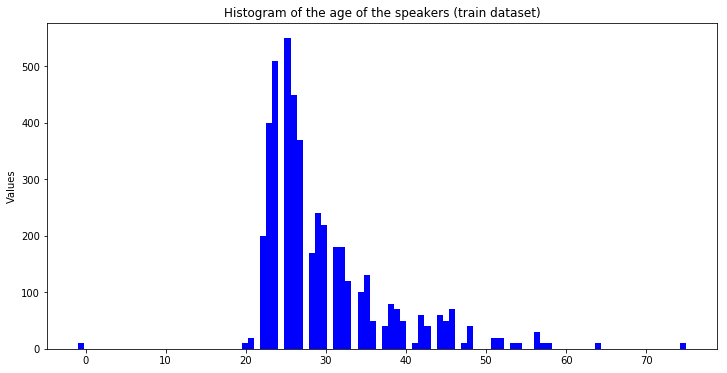

In [8]:
plt.figure(figsize=(12,6))                 
plt.hist(df_train.age, color='blue', bins=100)                     
plt.ylabel('Values')                        
plt.title('Histogram of the age of the speakers (train dataset)')      
plt.show()

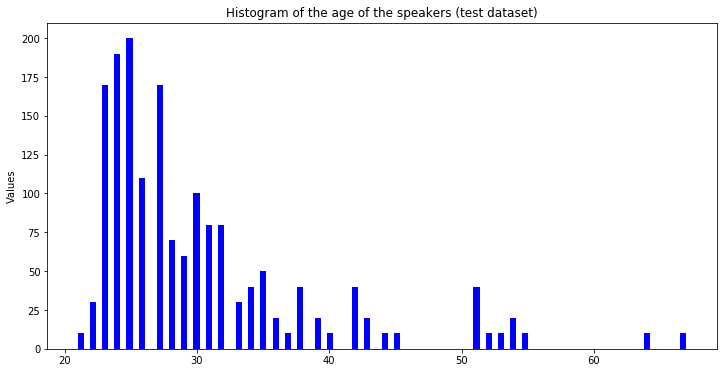

In [9]:
plt.figure(figsize=(12,6))                 
plt.hist(df_test.age, color='blue', bins=100)                     
plt.ylabel('Values')                        
plt.title('Histogram of the age of the speakers (test dataset)')      
plt.show()

In [10]:
df_train = df_train.replace(-1,np.nan)
values = {'age':df_train.age.mean()}
df_train = df_train.fillna(value=values)

In [11]:
df_train.describe()

,age
count,4620.000000
mean,29.722343
std,7.712699
min,20.000000
25%,25.000000
50%,27.000000
75%,32.000000
max,75.000000


In [12]:
print('Mean age of the speakers in the train dataset :', round(df_train.age.mean()).astype(int))
df_train['younger_than_mean_age'] = df_train.age.map(lambda age: 1 if age < round(df_train.age.mean()).astype(int) else 0)
df_test['younger_than_mean_age'] = df_test.age.map(lambda age: 1 if age < round(df_train.age.mean()).astype(int) else 0)

Mean age of the speakers in the train dataset : 30


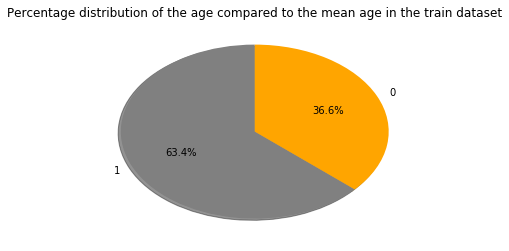

1    2930
0    1690
Name: younger_than_mean_age, dtype: int64

In [13]:
type = df_train['younger_than_mean_age'].value_counts()
labels = (np.array(type.index))
sizes = (np.array((type / type.sum())*100))
colors = ['grey', 'orange']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Percentage distribution of the age compared to the mean age in the train dataset")
plt.show()

df_train['younger_than_mean_age'].value_counts()

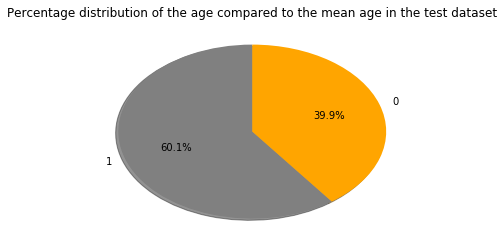

1    1010
0     670
Name: younger_than_mean_age, dtype: int64

In [14]:
type = df_test['younger_than_mean_age'].value_counts()
labels = (np.array(type.index))
sizes = (np.array((type / type.sum())*100))
colors = ['grey', 'orange']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Percentage distribution of the age compared to the mean age in the test dataset")
plt.show()

df_test['younger_than_mean_age'].value_counts()

In [15]:
df_train = utils.undersample(df_train, 'younger_than_mean_age', 0)
print("Train")
print(df_train['younger_than_mean_age'].value_counts())
print("\n")

print("Test")
df_test = utils.undersample(df_test, 'younger_than_mean_age', 0)
print(df_test['younger_than_mean_age'].value_counts())

Train
1    1690
0    1690
Name: younger_than_mean_age, dtype: int64


Test
1    670
0    670
Name: younger_than_mean_age, dtype: int64


In [16]:
df_train.head()

,soundPath,age,younger_than_mean_age
2851,TIMIT/TRAIN/DR5/FMPG0/SA2.wav,53.0,0
850,TIMIT/TRAIN/DR3/MDLC0/SA1.wav,43.0,0
2615,TIMIT/TRAIN/DR3/MMAM0/SX157.wav,24.0,1
965,TIMIT/TRAIN/DR2/FDNC0/SX288.wav,39.0,0
1106,TIMIT/TRAIN/DR2/FDXW0/SX251.wav,24.0,1


In [17]:
df_test.head()

,soundPath,age,younger_than_mean_age
51,TIMIT/TEST/DR5/FASW0/SA2.wav,55,0
1113,TIMIT/TEST/DR3/MMWH0/SX189.wav,26,1
1452,TIMIT/TEST/DR3/MRTK0/SX13.wav,27,1
422,TIMIT/TEST/DR6/MDSC0/SX138.wav,42,0
1143,TIMIT/TEST/DR7/MNLS0/SX133.wav,42,0


# Extracting audio files

In [18]:
train_audio_list = df_train.soundPath.tolist()
test_audio_list = df_test.soundPath.tolist()

In [19]:
train_temp_features = []
test_temp_features = []

for elt in train_audio_list:
    train_temp_features.append(utils.extract_features(elt))

for elt in test_audio_list:
    test_temp_features.append(utils.extract_features(elt))

# Preparation of train and test data

In [20]:
X_train = np.array(train_temp_features)
y_train = np.array(df_train['younger_than_mean_age'].tolist())
X_test = np.array(test_temp_features)
y_test = np.array(df_test['younger_than_mean_age'].tolist())

# Machine Learning

### Gaussian NB Classifier

In [21]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Test accuracy :  0.49776119402985075 

210 young people classified as older out of 670, 31.343 %
463 older people classified as younger out of 670, 69.104 %

              precision    recall  f1-score   support

           0       0.50      0.69      0.58       670
           1       0.50      0.31      0.38       670

   micro avg       0.50      0.50      0.50      1340
   macro avg       0.50      0.50      0.48      1340
weighted avg       0.50      0.50      0.48      1340



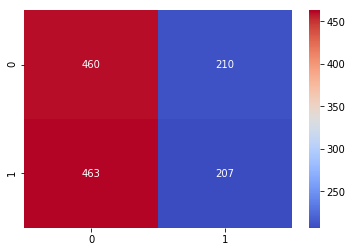

In [22]:
utils.test_age_classifier(clf, X_test, y_test)

In [24]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [25]:
classifier = model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 3380 samples, validate on 1340 samples
Epoch 1/10
3380/3380 [==============================] - 1s 230us/step - loss: 7.8969 - acc: 0.4997 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 2/10
3380/3380 [==============================] - 0s 103us/step - loss: 7.3637 - acc: 0.4997 - val_loss: 2.5287 - val_acc: 0.5000
Epoch 3/10
3380/3380 [==============================] - 0s 100us/step - loss: 2.0195 - acc: 0.4935 - val_loss: 0.6929 - val_acc: 0.5075
Epoch 4/10
3380/3380 [==============================] - 0s 109us/step - loss: 0.6935 - acc: 0.4879 - val_loss: 0.6931 - val_acc: 0.4993
Epoch 5/10
3380/3380 [==============================] - 0s 123us/step - loss: 0.6933 - acc: 0.4873 - val_loss: 0.6931 - val_acc: 0.5045
Epoch 6/10
3380/3380 [==============================] - 0s 107us/step - loss: 0.6933 - acc: 0.5024 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/10
3380/3380 [==============================] - 0s 107us/step - loss: 0.6933 - a

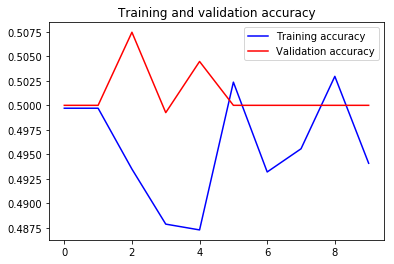

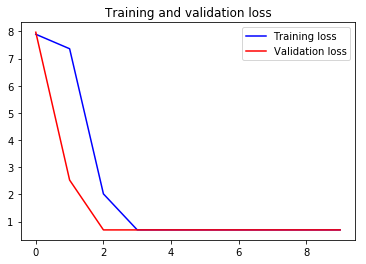

In [26]:
utils.model_curves(classifier)

In [27]:
scores = model.evaluate(X_test, y_test)
print("Score : %.2f%%" % (scores[1]*100))

1340/1340 [==============================] - 0s 26us/step
Score : 50.00%


In [28]:
y_pred = model.predict(X_test)

In [35]:
from scipy.io import wavfile as wav
import IPython.display as ipd
import random

labels = ["older than mean age","younger than mean age"]
n_test = X_test.shape[0]
speaker_ages = df_test.age.tolist()
ir = random.randint(0,n_test)
print("Filename :", test_audio_list[ir])
print("Model prediction :", labels[y_pred[ir].astype(int)[0]])
print("Real age of the speaker :", speaker_ages[ir])
ipd.Audio(test_audio_list[ir])

Filename : TIMIT/TEST/DR8/FCMH1/SX143.wav
Model prediction : older than mean age
Real age of the speaker : 23
